# 6. Hand shape image classification

## 6.2 initial learning

In [1]:
import os
import sys
import glob
import numpy as np
from skimage import io
from sklearn import datasets

In [2]:
#define constant
IMAGE_SIZE = 40
COLOR_BYTE = 3
CATEGORY_NUM = 6

In [3]:
#function for getting hand image

def load_handimage(path):
    files = glob.glob(os.path.join(path, '*/*.png'))
    
    #allocate for image and label
    images = np.ndarray((len(files), IMAGE_SIZE,IMAGE_SIZE, COLOR_BYTE),
                       dtype = np.uint8)
    labels = np.ndarray(len(files), dtype=np.int)
    
    for idx, file in enumerate(files):
        #load image
        image = io.imread(file)
        images[idx] = image
        
        #get label name (※dir name represents label)
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = label
    
    #follow other datasets' format in scikit-learn
    flat_data = images.reshape((-1, IMAGE_SIZE*IMAGE_SIZE*COLOR_BYTE))
    images = flat_data.view()
    return datasets.base.Bunch(data=flat_data,
                              target=labels.astype(np.int),
                              target_names=np.arange(CATEGORY_NUM),
                              images=images,
                              DESCR=None)


In [4]:
train_path='./data/my_learn8'
test_path='./data/my_test2'

In [5]:
from sklearn import svm, metrics

#load dataset
train = load_handimage(train_path)
test = load_handimage(test_path)

#instantiate model and fit
classifier = svm.LinearSVC()
classifier.fit(train.data, train.target)

#evaluate perfornace with test data
predicted = classifier.predict(test.data)

print('Accuracy:', metrics.accuracy_score(test.target, predicted))

Accuracy: 0.9166666666666666


In [6]:
train_path='./data/my_learn10'
test_path='./data/other_test2'

In [7]:
#load dataset
train = load_handimage(train_path)
test = load_handimage(test_path)

#instantiate model and fit
classifier = svm.LinearSVC()
classifier.fit(train.data, train.target)

#evaluate perfornace with test data
predicted = classifier.predict(test.data)

print('Accuracy:', metrics.accuracy_score(test.target, predicted))

Accuracy: 0.16666666666666666


## 6.4 use more dataset

### 6.4.2 train and evaluate

In [8]:
import glob
import os

data_dir = './data'

path_list = sorted(glob.glob(os.path.join(data_dir, '*')))
path_list = path_list[:-4]

print(path_list)

['./data/m01', './data/m02', './data/m03', './data/m04', './data/m04c', './data/m05', './data/m06', './data/m07', './data/m08', './data/m09', './data/m10', './data/m11', './data/m12', './data/m13', './data/m14', './data/m15', './data/m16']


In [9]:
import numpy as np

n_test = 4 # number of test directory

'''
# option : randomize directory
indice = np.arange(len(path_list))
np.random.seed(0)
np.random.shuffle(indice)

paths_for_test = sorted(np.array(path_list)[indice[:n_test]])
paths_for_train = sorted(np.array(path_list)[indice[n_test:]])
'''

#set directories explicitly to follow textbook
paths_for_test =['./data/m01', './data/m05', './data/m06', './data/m07']
paths_for_train =['./data/m02', './data/m03', './data/m04', './data/m08', './data/m09', './data/m10', 
                './data/m11', './data/m12', './data/m13', './data/m14', './data/m15', './data/m16']

print('test ', paths_for_test)
print('train', paths_for_train)

test  ['./data/m01', './data/m05', './data/m06', './data/m07']
train ['./data/m02', './data/m03', './data/m04', './data/m08', './data/m09', './data/m10', './data/m11', './data/m12', './data/m13', './data/m14', './data/m15', './data/m16']


In [10]:
# prepare train dataset
train_data = []
train_label = []

for path in paths_for_train:
    d = load_handimage(path)
    train_data.append(d.data)
    train_label.append(d.target)

train_data = np.concatenate(train_data)
train_label = np.concatenate(train_label)

In [11]:
#classify by SVM
from sklearn import svm, metrics

#instantiate model
classifier = svm.LinearSVC()

#fit
classifier.fit(train_data, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### 6.4.3 discussion

In [13]:
# evaluate performance of model with each test dataset

for path in paths_for_test:
    d = load_handimage(path)
    predicted = classifier.predict(d.data)
    
    print('### {0} ###'.format(path))
    print('Accuracy:', metrics.accuracy_score(d.target, predicted))
    print('Classification_Report:\n{0}\n'.format(metrics.classification_report(d.target, predicted)))


### ./data/m01 ###
Accuracy: 0.725
Classification_Report:
             precision    recall  f1-score   support

          0       0.76      0.97      0.85       100
          1       0.57      0.39      0.46       100
          2       0.55      0.53      0.54       100
          3       0.74      0.58      0.65       100
          4       0.72      0.88      0.79       100
          5       0.94      1.00      0.97       100

avg / total       0.71      0.72      0.71       600


### ./data/m05 ###
Accuracy: 0.625
Classification_Report:
             precision    recall  f1-score   support

          0       0.61      1.00      0.76       100
          1       0.55      0.41      0.47       100
          2       0.54      0.38      0.45       100
          3       0.57      0.74      0.65       100
          4       0.64      0.72      0.68       100
          5       1.00      0.50      0.67       100

avg / total       0.65      0.62      0.61       600


### ./data/m06 ###
Accuracy:

##  <font color="Red">original part : follow the discussion on textbook with working code</font>

 ### check : the reason why data/m01 got better performance than others.

====== ./data/m01 ======


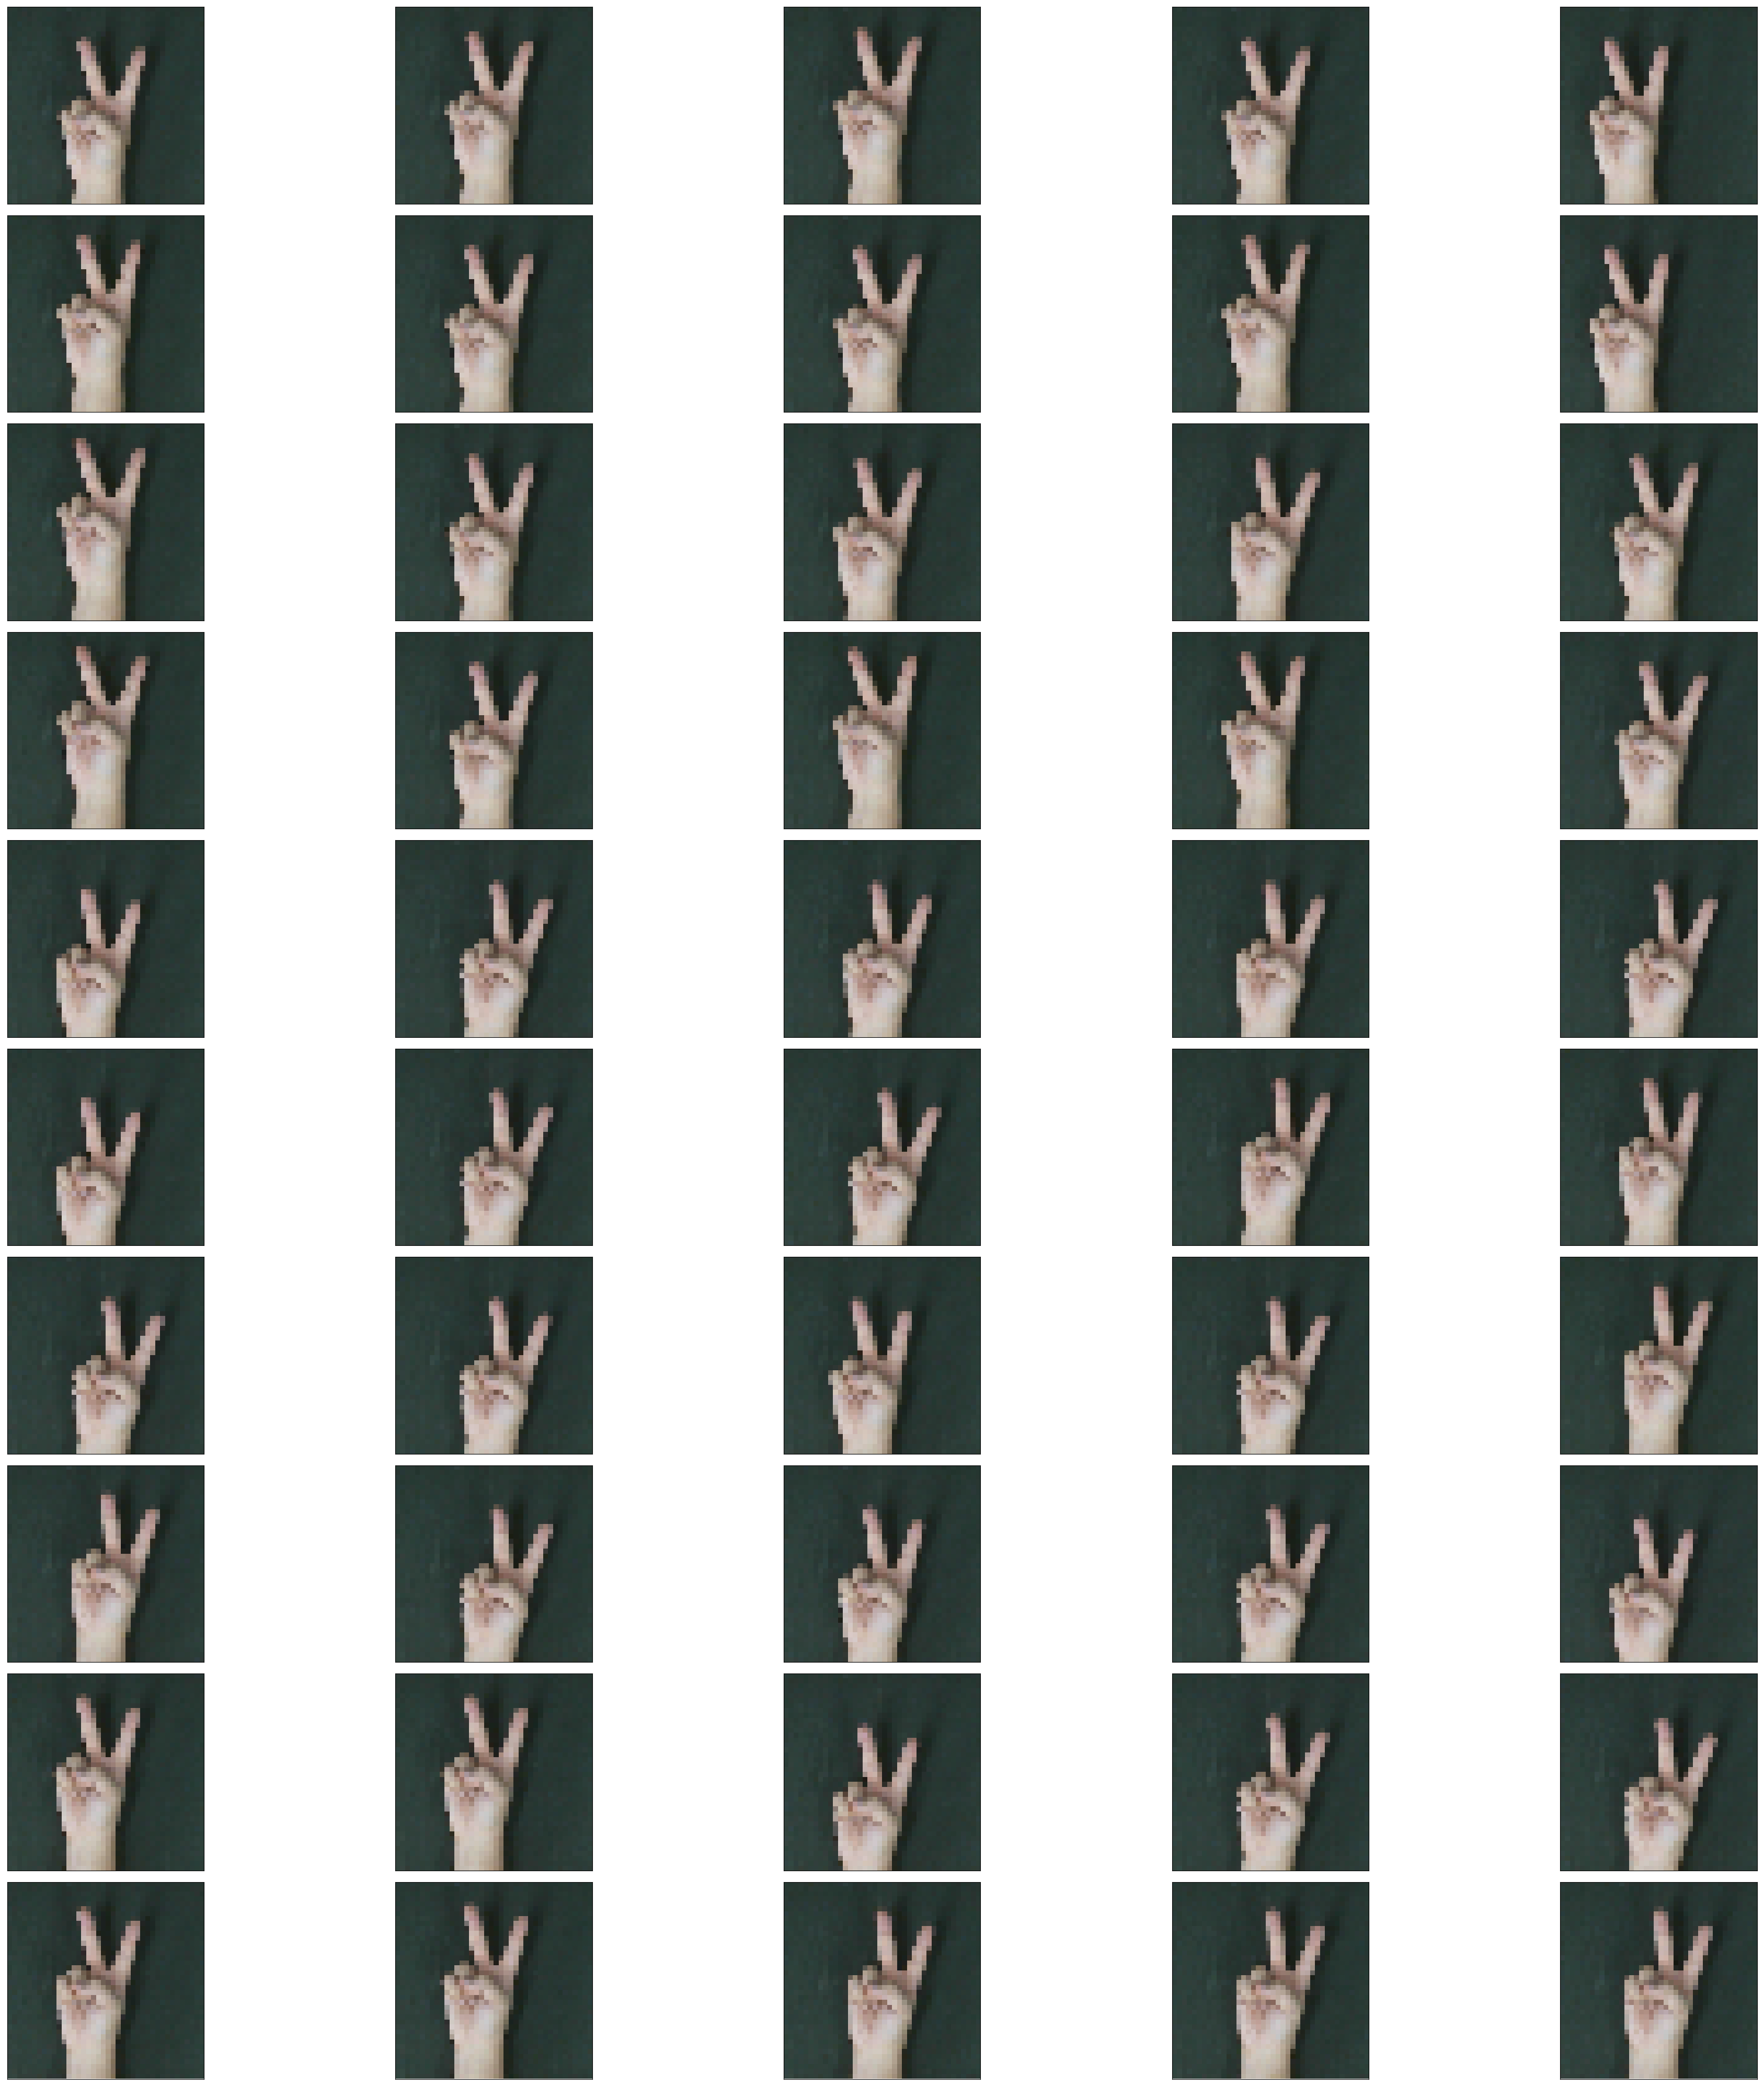

====== ./data/m05 ======


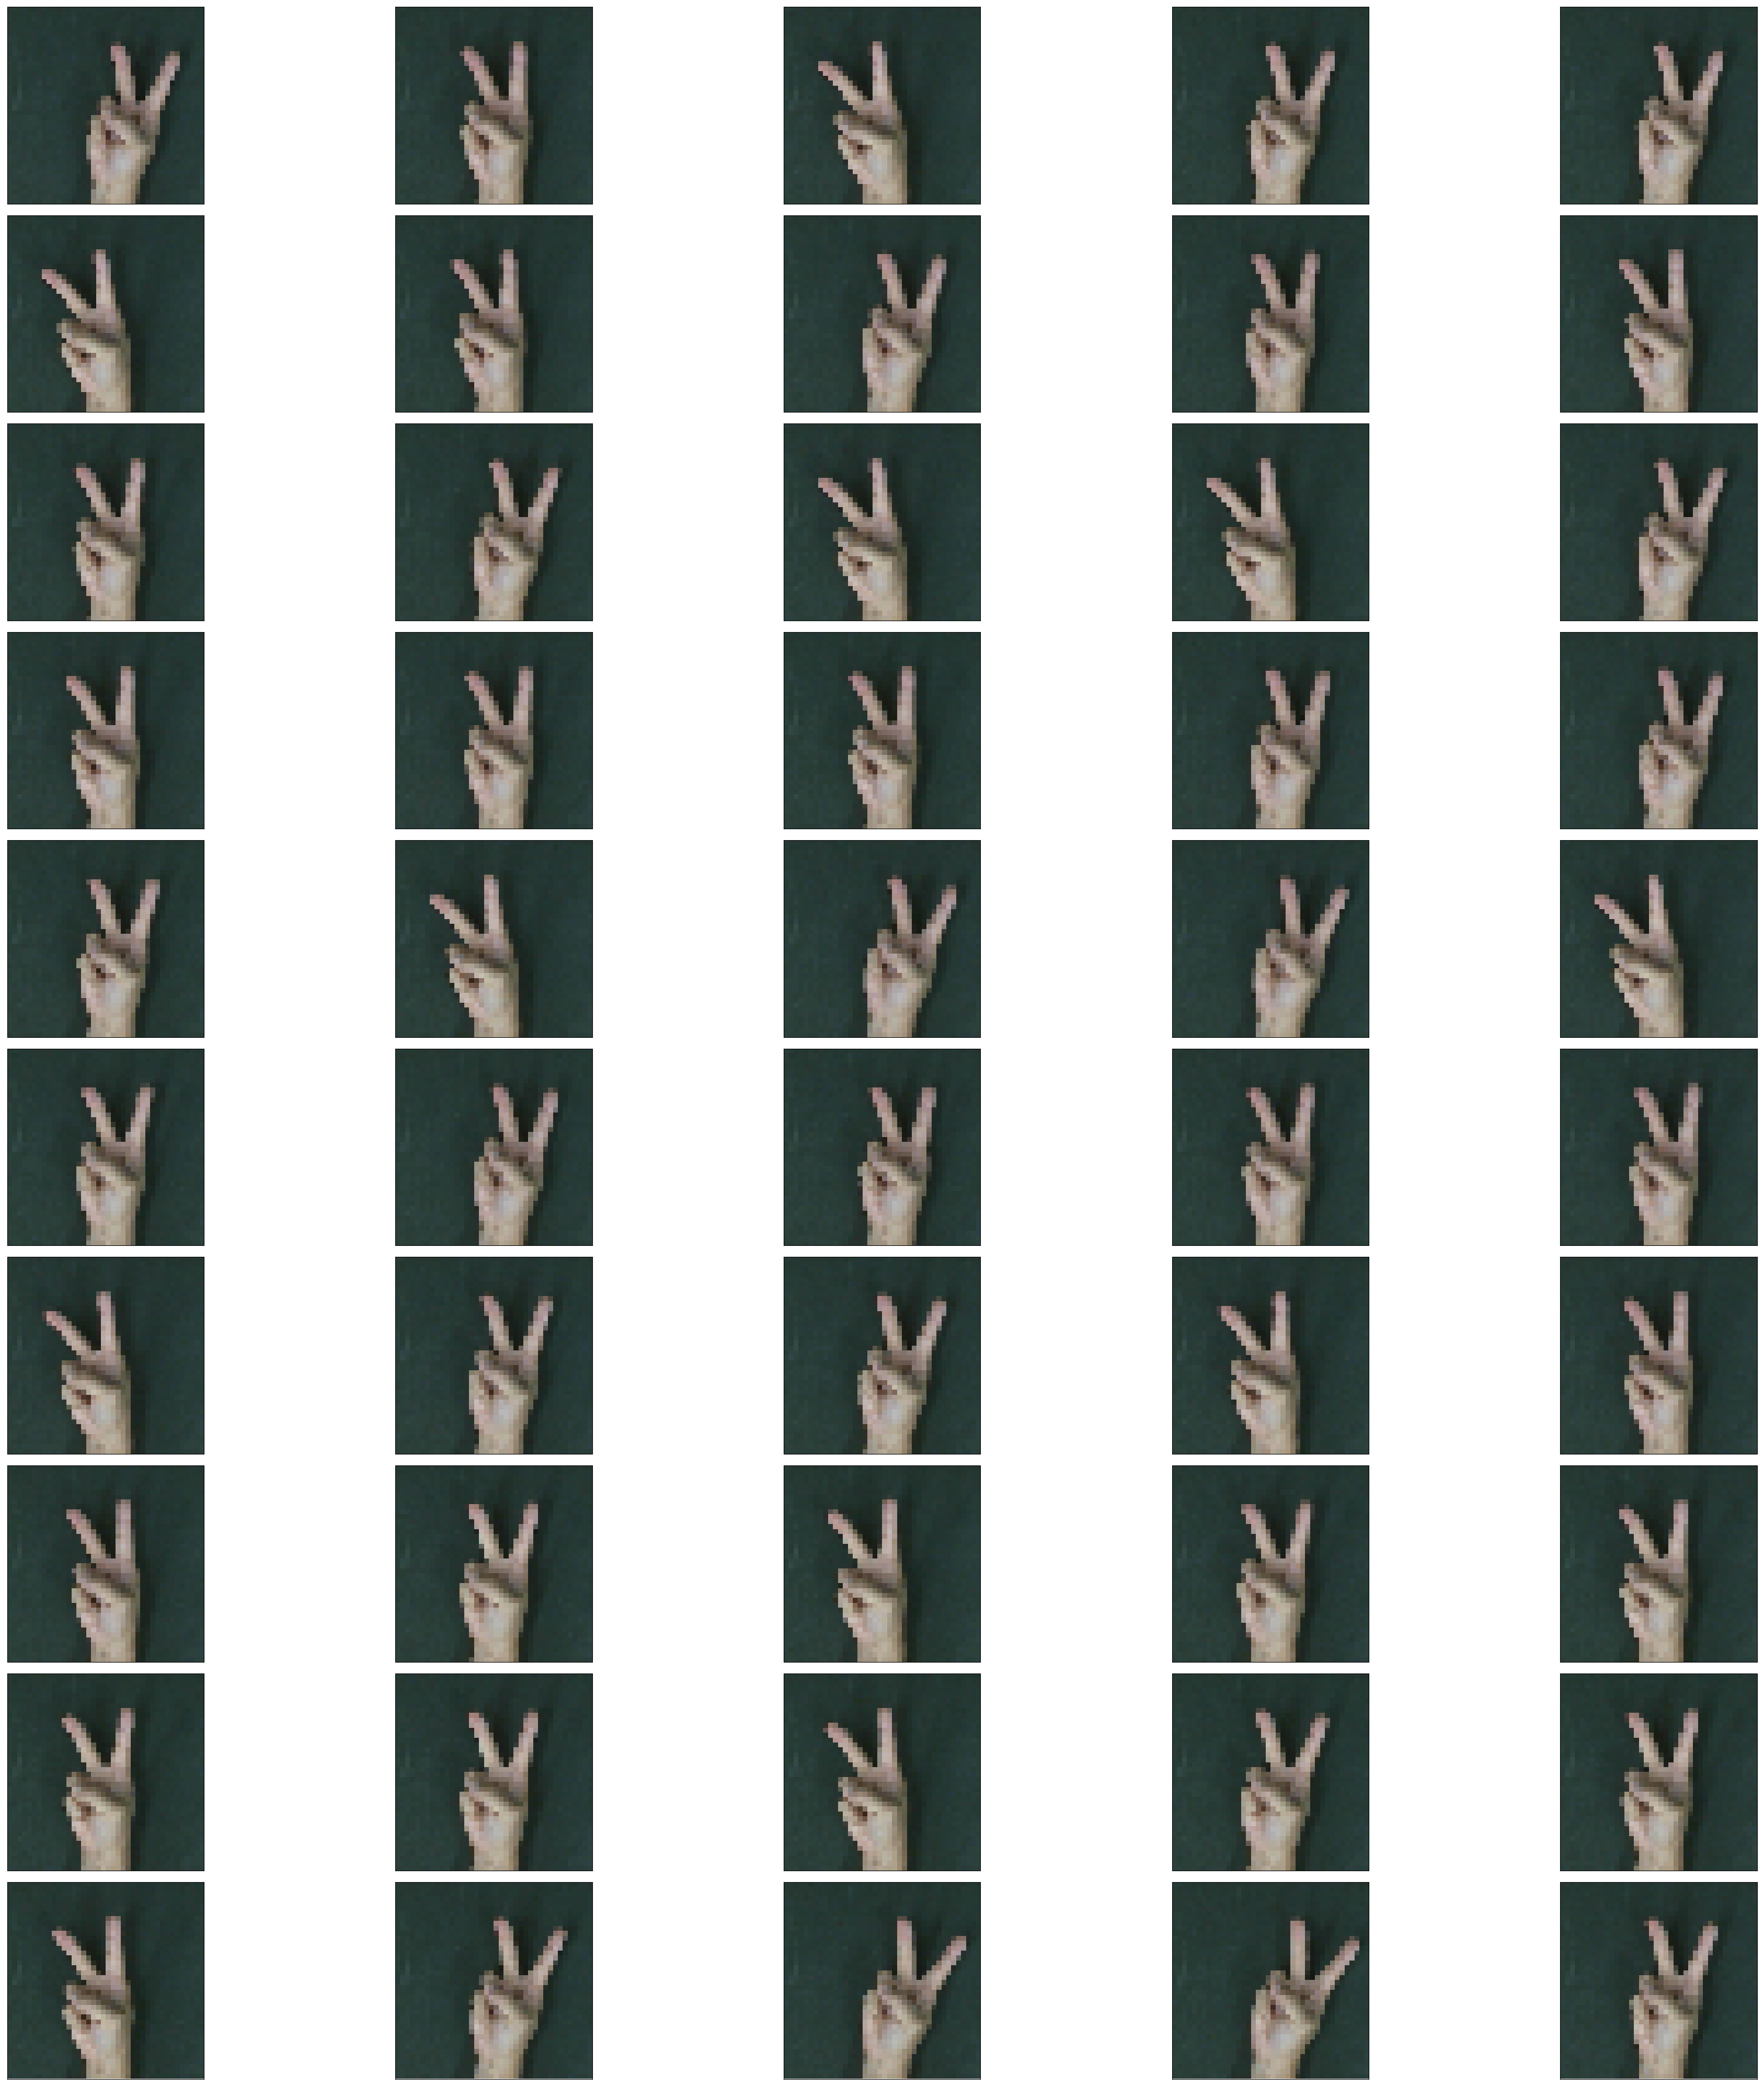

====== ./data/m06 ======


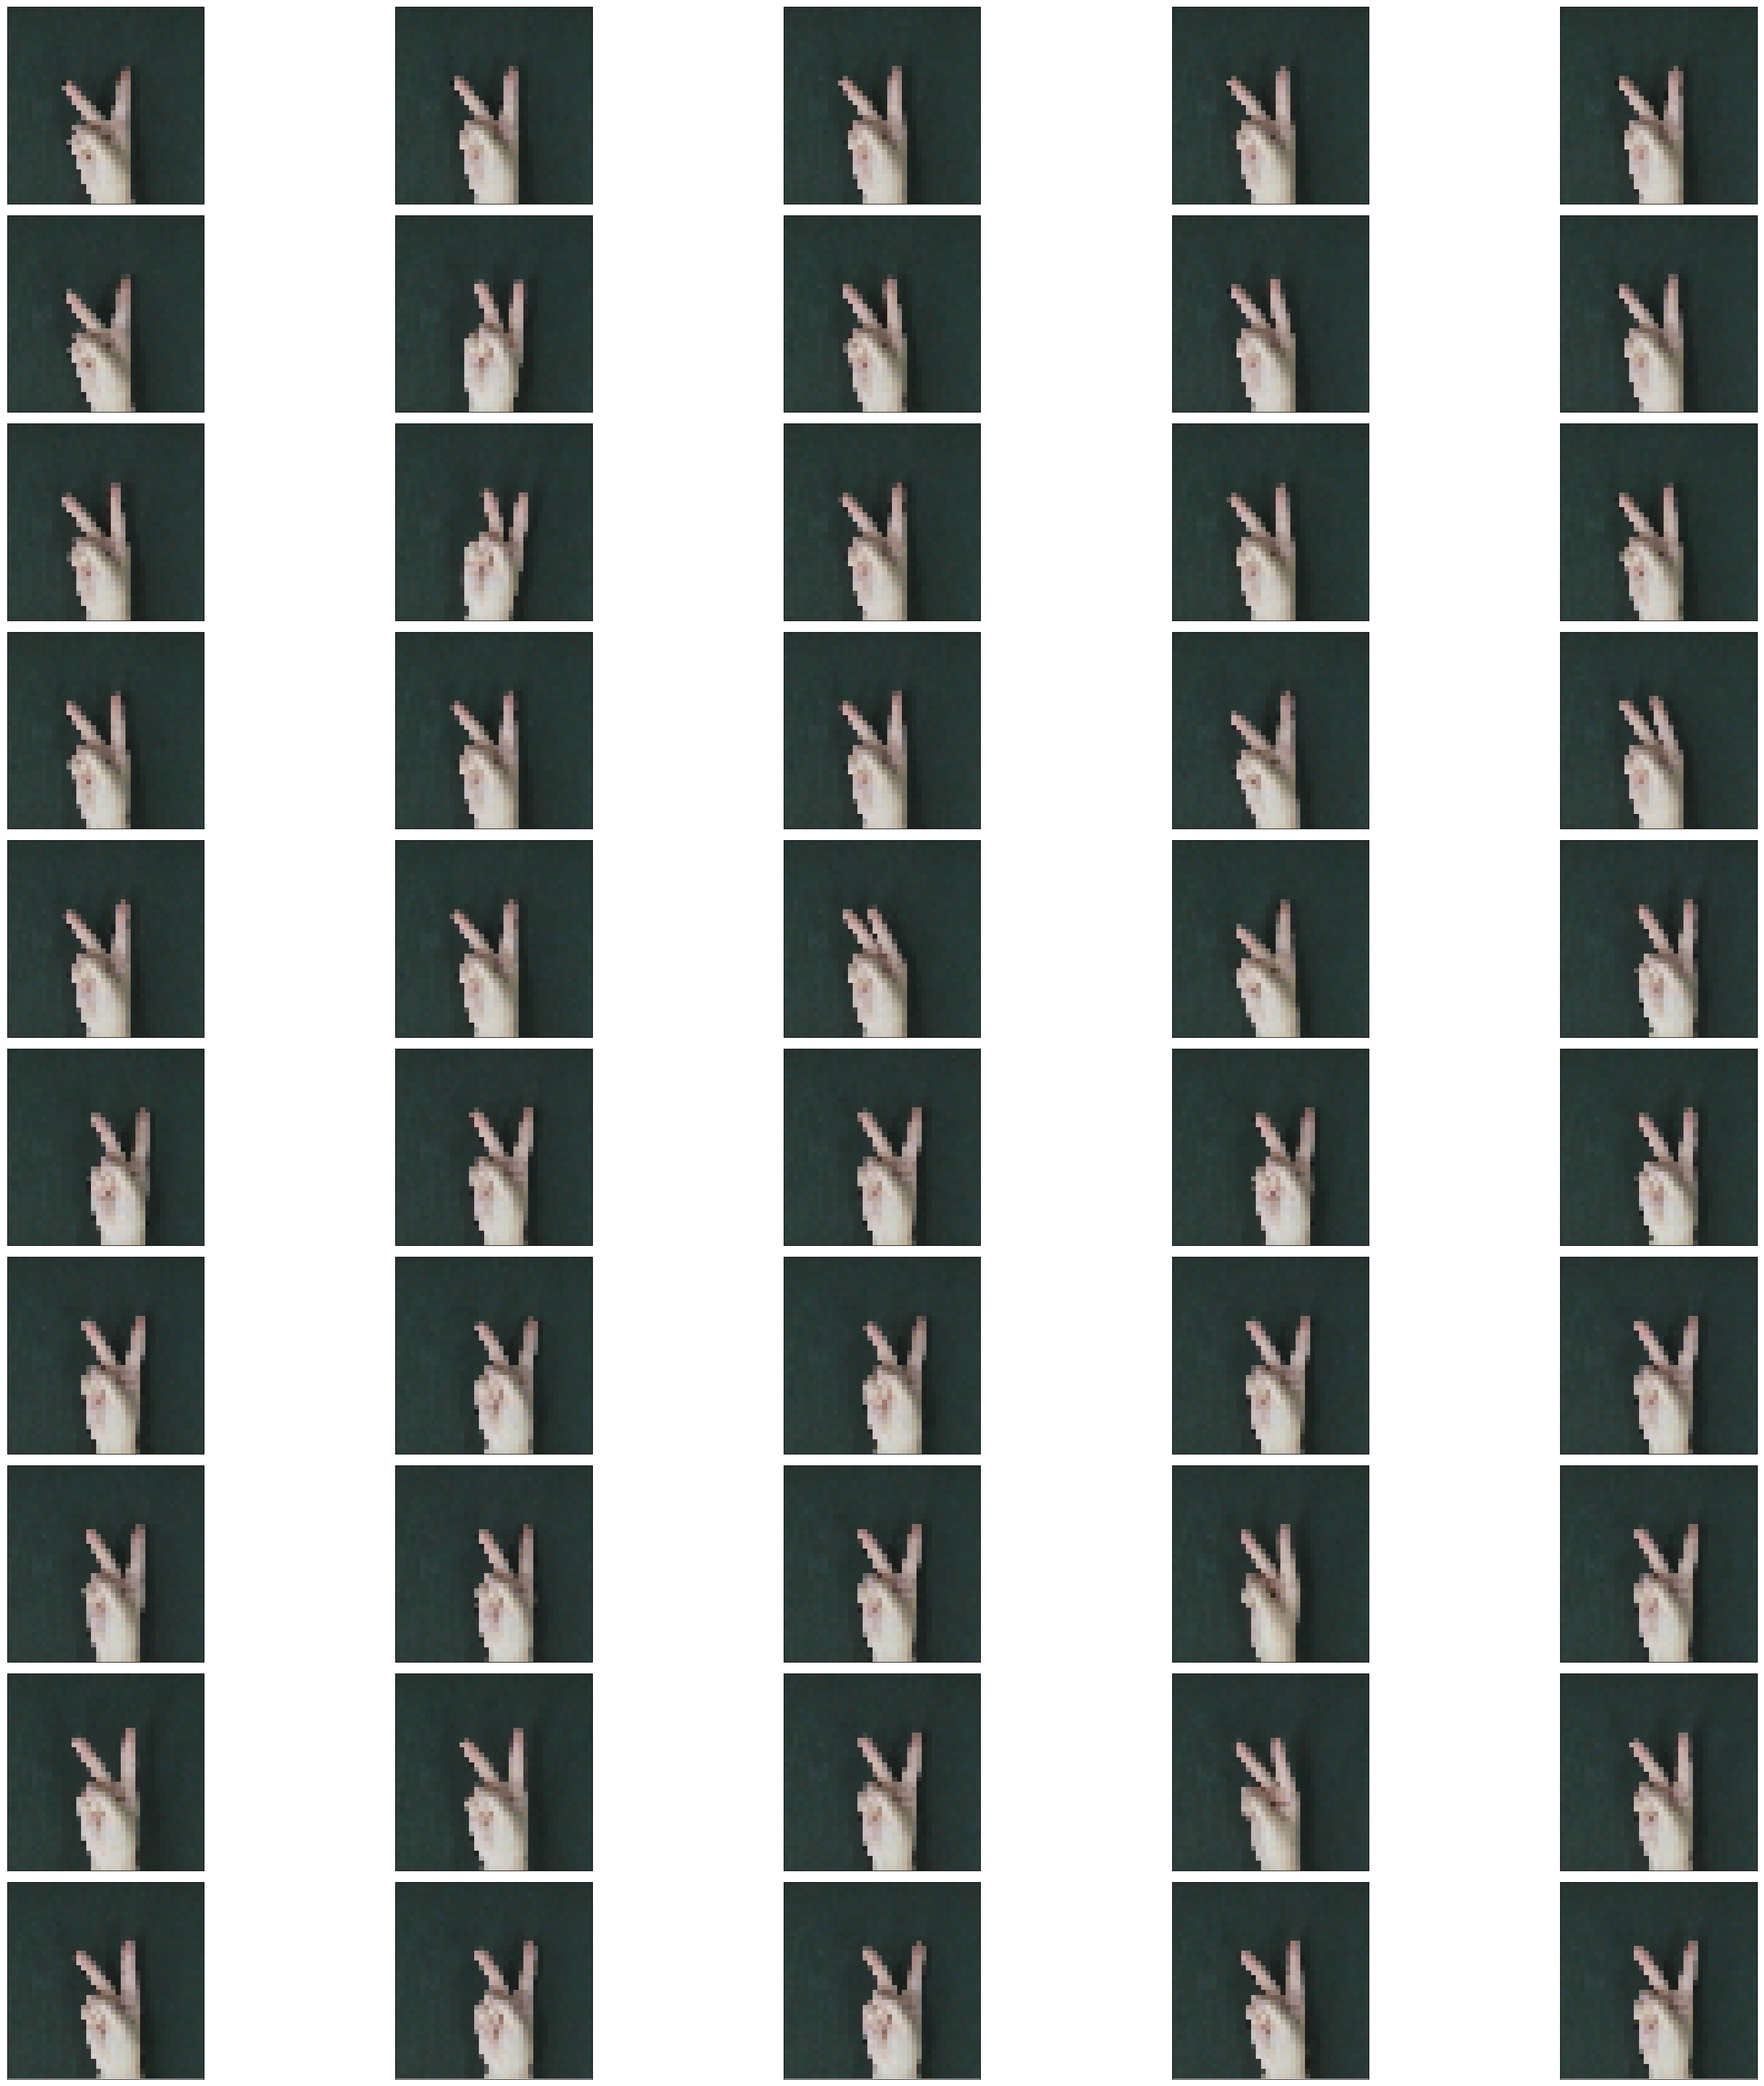

====== ./data/m07 ======


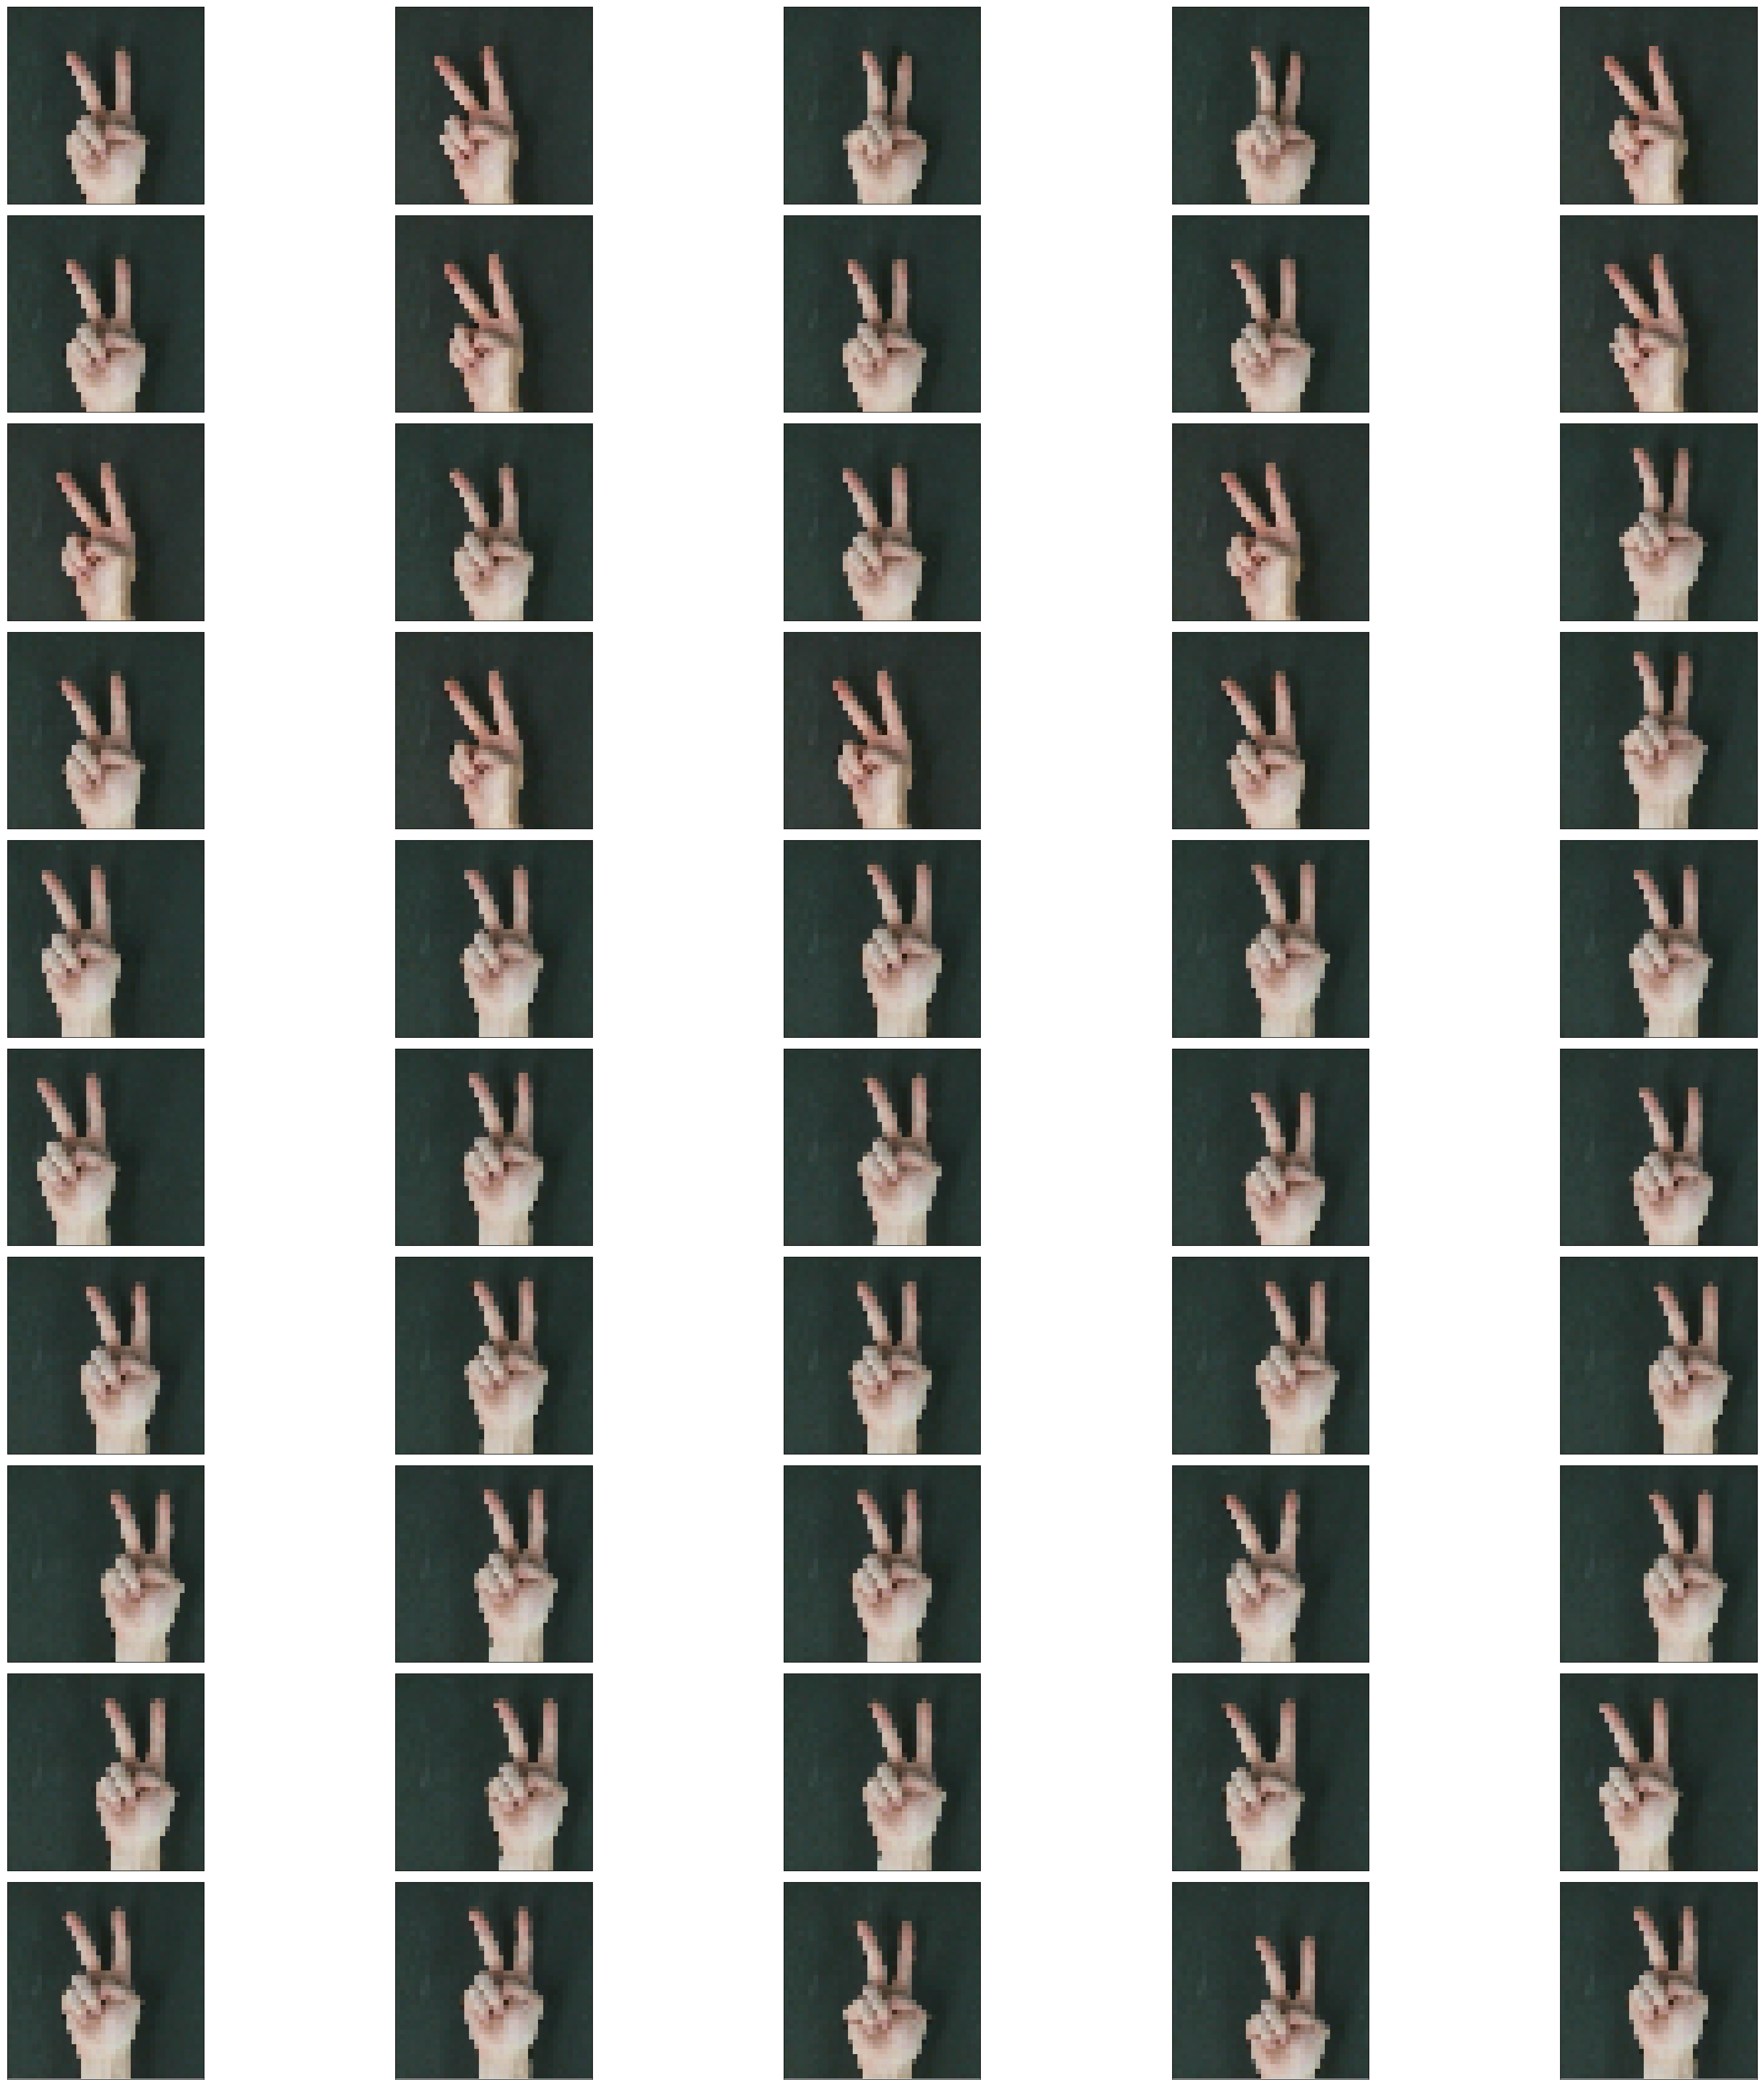

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

num_images = 50

for path in paths_for_test:
    d = load_handimage(path)
    images_2 = d.images[d.target==2]
    images_2 = images_2.reshape(-1 ,IMAGE_SIZE, IMAGE_SIZE, COLOR_BYTE)
    
    print('====== {0} ======'.format(path))
    
    fig = plt.figure(figsize=(40,40),dpi=100)
    
    for i, image in enumerate(images_2[:num_images]):
    
        plt.subplot(num_images/5,5,i+1)
        plt.imshow(image)
        
        ax = plt.gca()
        ax.tick_params(labelbottom=False, bottom=False)
        ax.tick_params(labelleft=False, left=False)
        
    plt.tight_layout()
    plt.show()
    

### result : images in data/m01 tend to be more regulated than others.

### 16-fold cross validation

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_score

# prepare train dataset
train_data = []
train_label = []

#set list of path explicitly
path_list =['./data/m01', './data/m02', './data/m03', './data/m04', './data/m05', './data/m06', './data/m07',
            './data/m08', './data/m09', './data/m10', './data/m11', './data/m12', './data/m13', './data/m14',
            './data/m15', './data/m16']
groups = []

for i, path in enumerate(path_list):
    d = load_handimage(path)
    train_data.append(d.data)
    train_label.append(d.target) 
    groups.append([i+1 for _ in range(len(d.data))])
    
train_data = np.concatenate(train_data)
train_label = np.concatenate(train_label)
groups = np.concatenate(groups)

#instantiate model
classifier = svm.LinearSVC()
scores = cross_val_score(classifier, train_data, train_label, groups=groups, cv=16)
   
print('16 fold cross validation score ')
for path, score in zip(path_list, scores):
    print('{0} : {1}'.format(path, score))
